<a href="https://colab.research.google.com/github/Deon254/Compiler_Construction/blob/main/Lab_Work_Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   110947 Deon Muthuri
2.   90775 Peter Mumo
3.   112633 Adan Keith
4.   109023 Ryan Gichana
5.   110328 Alfred Mwaniki






# **1. Flex(Fast Lexical Analyzer Generator)**  - Is a tool for generating scanners. Instead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Simple), write a specification of patterns using regular expressions (e.g. DIGIT [0-9]), and FLEX will construct a scanner for you. The scanner performs lexical analysis of a certain program.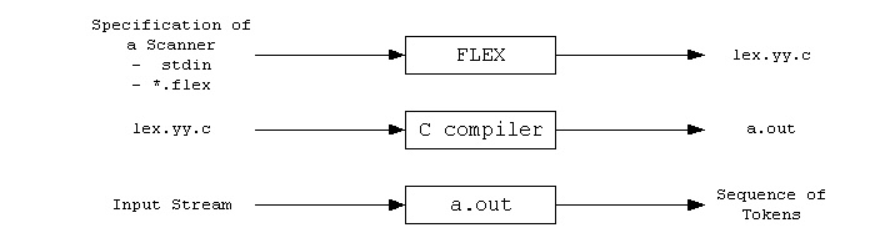


*.lex is in the form of pairs of regular expressions and C code.


lex.yy.c defines a routine yylex() that uses the specification to recognize tokens.

a.out is  the scanner!

The following flex input specifies a scanner which, whenever it encounters the string `username', will replace it with the user's login name:

In [ ]:


%{
/* need this for the call to getlogin() below */
#include <unistd.h>
%}

%%
username	printf("%s\n", getlogin());
%%

main()
{
  yylex();
}



SyntaxError: ignored

2. **Bison** <br>
Bison is a general purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR)parser employing LALR, IELR or canonical LR parser tables. Parsing is the process of matching grammar symbols to elements in the input data, according to rules of grammar. A parser works by getting a sequence of tokens from the lexical analyzer and determines its structure in the form of a parse tree. The parse tree shows the hierarchial structure of the input data and the mapping of symbols to data elements and is nodes show grammar symbols while the edges show derivation steps. Bison is a bottom-up parser that works using shifts and reductions, that try to reduce the entire input down to a single grouping whose symbol is the grammar's start symbol. <br>
The diagram below shows the inner works of a Bison Parser:
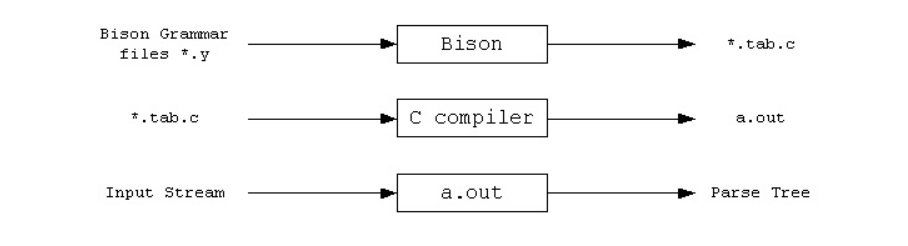
<br>
Below is a code snippet of a location tracking calculator developed using C and Bison:

In [ ]:
/* Code Snippet for Location Tracking calculator written using C and Bison Language */ 
%{
#include <math.h>
int yylex (void);
void yyerror (char const *);
%} v
/* Bison declarations. */
%define api.value.type {int}
%token NUM
%left ’-’ ’+’
%left ’*’ ’/’
%precedence NEG
%right ’^’
%% /* The grammar follows. */
input:
%empty
| input line
;
line:
’\n’
| exp ’\n’ { printf ("%d\n", $1); }
;
exp:
NUM
| exp ’+’ exp { $$ = $1 + $3; }
| exp ’-’ exp { $$ = $1 - $3; }
| exp ’*’ exp { $$ = $1 * $3; }
| exp ’/’ exp
{
if ($3)
$$ = $1 / $3;
else
{
$$ = 1;
fprintf (stderr, "%d.%d-%d.%d: division by zero",
@3.first_line, @3.first_column,
@3.last_line, @3.last_column);
}
}
| ’-’ exp %prec NEG { $$ = -$2; }
| exp ’^’ exp { $$ = pow ($1, $3); }
| ’(’ exp ’)’ { $$ = $2; }
int
yylex (void)
{
int c;
/* Skip white space. */
while ((c = getchar ()) == ’ ’ || c == ’\t’)
++yylloc.last_column;
/* Step. */
yylloc.first_line = yylloc.last_line;
yylloc.first_column = yylloc.last_column;
/* Process numbers. */
if (isdigit (c))
{
yylval = c - ’0’;
++yylloc.last_column;
while (isdigit (c = getchar ()))
{
++yylloc.last_column;
yylval = yylval * 10 + c - ’0’;
}
ungetc (c, stdin);
return NUM;
}
/* Return end-of-input. */
if (c == EOF)
return YYEOF;
/* Return a single char, and update location. */
if (c == ’\n’)
{
++yylloc.last_line;
yylloc.last_column = 0;
}
else
++yylloc.last_column;
return c;
}
int
main (void)
{
yylloc.first_line = yylloc.last_line = 1;
yylloc.first_column = yylloc.last_column = 0;
return yyparse ();
}



SyntaxError: ignored

Bison References: <br>
1. https://www.gnu.org/software/bison/manual/bison.pdf
2. http://alumni.cs.ucr.edu/~lgao/teaching/bison.html#parser

### 3. Lex (Lexical Analyzer Generator)
Lex is a tool used to generate a lexical analyzer. It usually works with the YACC parser. It transforms a set of regular expressions into a corresponding finite state machine implemented in the C language. When compiled, the C program yields a lexical analyzer, which produces a stream of tokens, given character input.

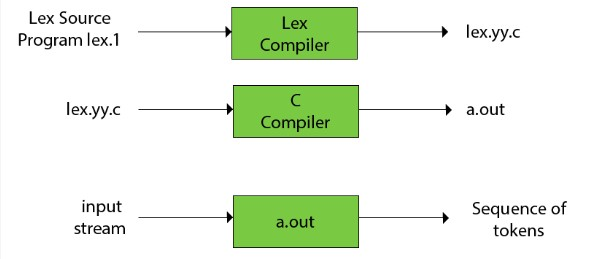

Below is a code snippet showing an example of a simple lex program.

In [ ]:
"""
/* declarations */
%{
    #include<stdio.h>
    int global_variable;
}%

/* Regular expressions to be used for rule matching*/
number [0-9]+
op[-|+|*|/|^|=]

/* rules */
%%
    {number} {printf("" number");}
    {op} {printf(" operator");}
%%

/* functions - executed after lexical analysis is done */ 
int main()
{
    yylex(); // This function stores the generated C code for the above rules
    return 1;
}

This program will output 'number' when given number input e.g 17
It will output 'operator' when given operator input e.g +
"""

Lex References:


1.   http://dinosaur.compilertools.net/lex/index.html
2.   https://www.ibm.com/docs/en/aix/7.2?topic=information-generating-lexical-analyzer-lex-command
3.   https://iq.opengenus.org/lexical-analyzer-generator-lex/



4. Yacc

Yacc provides a general tool for describing the input to a computer program. The Yacc user specifies the structures of his input, together with code to be invoked as each such structure is recognized. Yacc turns such a specification into a subroutine that handles the input process; 
The input subroutine produced by Yacc calls a user-supplied routine to return the next basic input item.
The construction of translation using YACC is illustrated in the figure below:

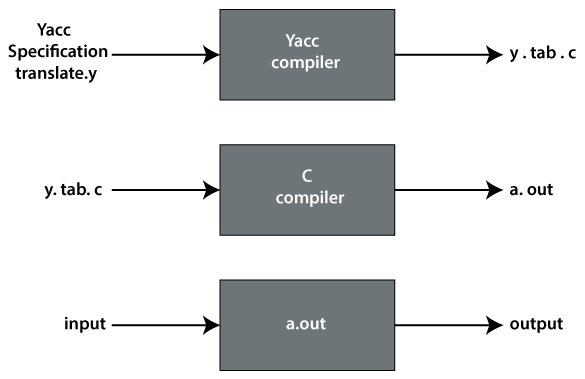

Below is an example of a Yacc code snippet simulating a calculator



In [ ]:
%{
#define YYSTYPE double
#include <math.h>
%}
%token NUM
%% /* Grammar rules and actions follow */
input : /* empty */
| input line
;
line : ’\n’
| exp ’\n’ { printf ("\t%.10g\n", $1); }
;
exp : NUM { $$ = $1; }
| exp exp ’+’ { $$ = $1 + $2; }
| exp exp ’-’ { $$ = $1 - $2; }
| exp exp ’*’ { $$ = $1 * $2; }
| exp exp ’/’ { $$ = $1 / $2; }
/* Exponentiation */
| exp exp ’^’ { $$ = pow ($1, $2); }
/* Unary minus */
| exp ’n’ { $$ = -$1; }
;
71
%%
/* Lexical analyzer returns a double floating point
number on the stack and the token NUM, or the ASCII
character read if not a number. Skips all blanks
and tabs, returns 0 for EOF. */
#include <ctype.h>
yylex ()
{ int c;
/* skip white space */
while ((c = getchar ()) == ’ ’ || c == ’\t’)
;
/* process numbers */
if (c == ’.’ || isdigit (c))
{
ungetc (c, stdin);
scanf ("%lf", &yylval);
return NUM;
}
/* return end-of-file */
if (c == EOF)
return 0;
/* return single chars */
return c;
}
main () /* The ‘‘Main’’ function to make this stand-alone */
{
yyparse ();
}
#include <stdio.h>
yyerror (s) /* Called by yyparse on error */
char *s;
{
printf ("%s\n", s);
}

Lab 3

In [ ]:
%{
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
  int op = 0,i;
  float a, b;
%}
  
number [0-9]+|([0-9]*)"."([0-9]+)
add "+"
sub "-"
mul "*"
div "/"
pow "^"
ln \n
%%
  


{add} {op=1;}
{sub} {op=2;}
{mul} {op=3;}
{div} {op=4;}
{pow} {op=5;}
{ln} {printf("\n The Answer :%f\n\n",a);}
  
%%
int dig()
{
 if(op==0)
  
/* atof() is used to convert 
      - the ASCII input to float */
 a=atof(yytext); 
  
 else
 {
 b=atof(yytext);
  
 switch(op)
 {
   case 1:a=a+b;
    break;
  
   case 2:a=a-b;
   break;
   
   case 3:a=a*b;
   break;
   
   case 4:a=a/b;
   break;
   
   case 5:for(i=a;b>1;b--)
   a=a*i;
   break;
  }
//  op=0;
 }
}
  
int main(int argv,char *argc[])
{
 yylex();
}
  
int yywrap()
 {
  return 1;
 }
 

Yacc References

http://dinosaur.compilertools.net/yacc/index.html
http://www.admb-project.org/tools/flex/compiler.pdf
https://www.tutorialandexample.com/yacc
http://alumni.cs.ucr.edu/~lgao/teaching/flex.html

# **Lab 4**

**1. Using an example or illustration, explain what is predictive parsing?**
<br>

A predictive parser is a recursive descent parser which serves as another method that implements the technique of Top-Down parsing. It is a top-down parser that does not require backtracking. At each step, the choice of the rule to be expanded is made upon the next terminal symbol.Predictive Parsers has the following components: 
1. Input Buffer − The input buffer includes the string to be parsed followed by an end marker $ to denote the end of the string.
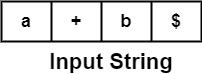

Here a, +, b are terminal symbols.
2. Stack - It contains a combination of grammar symbols with on the bottom of the stack. At the start of Parsing, the stack contains the start symbol of Grammar followed by $.

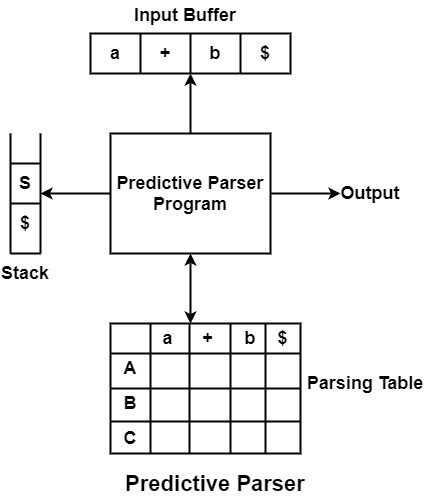

3. Parsing table- It is a two-dimensional array or Matrix M [A, a] where A is nonterminal and 'a' is a terminal symbol.

All the terminals are written column-wise, and all the Non-terminals are written rowwise.

Algorithm to construct Predictive Parsing Table
**bold text**

Input − Context-Free Grammar G

Output − Predictive Parsing Table M

Method − For the production A → α of Grammar G.

For each terminal, a in FIRST (𝛼) add A → α to M [A, a].

If ε is in FIRST (α), and b is in FOLLOW (A), then add A → α to M[A, b].

If ε is in FIRST (α), and $ is in FOLLOW (A), then add A → α to M[A, $].

All remaining entries in Table M are errors.

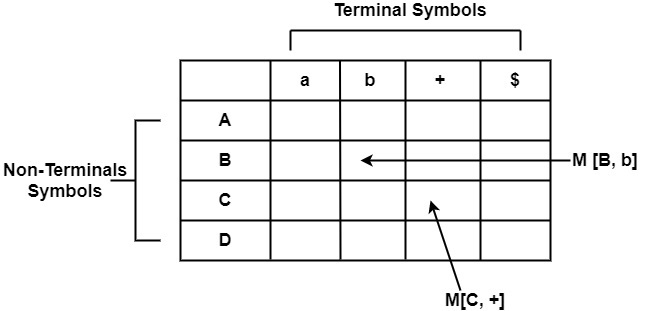




**2. As an extension to question 1, <br>
a. What is LL (1) parsing?<br>
b. Why do we get the First () and Follow () i.e. what do these two functions Really
Represent?**

2a. LL(1) parsing is a top-down parsing method in the syntax analysis phase of compiler design in which the top-down parser uses a one-token lookahead. The first L indicates that the input is read from left to right and the second L shows that a left-to-right derivation is produced. The 1 stands for using a one lookahead token. Required components for LL(1) parsing are input string, a stack, parsing table for given grammar, and parser.

2b. Why do we get the First() and Follow() i.e. what do these two functions really represent?

The First() and Follow() helps decide which production to use in parsing the grammar by looking ahead. The two must be in agreement, otherwise we cannot parse the grammar using that production. Follow() is also used in panic-mode error recovery by synchronizing tokens.

**3. Are there any unique attributes associated with Top-Down parsing**

*Top*-down parsing attempts to find the left most derivations for an input string.

This parsing technique uses Left Most Derivation.

In this parsing technique we start parsing from the top (start symbol of parse tree) to down (the leaf node of parse tree) in a top-down manner.

*References*

1. https://www.tutorialspoint.com/what-is-a-predictive-parser
2. http://www.cs.ecu.edu/karl/5220/spr16/Notes/Top-down/LL1.html
3. https://www.geeksforgeeks.org/ll1-parsing-algorithm/?id=discuss
4. https://www3.cs.stonybrook.edu/~amione/CSE304_Course/materials/lectures/Lecture08.pdf

# **LAB  5**



1. Lexical analysis 

Lexical Analysis is the first phase when compiler scans the source code. This process can be left to right, character by character, and group these characters into tokens. Here, the character stream from the source program is grouped in meaningful sequences by identifying the tokens. It makes the entry of the corresponding tickets into the symbol table and passes that token to next phase.

Example:

x+2*y 


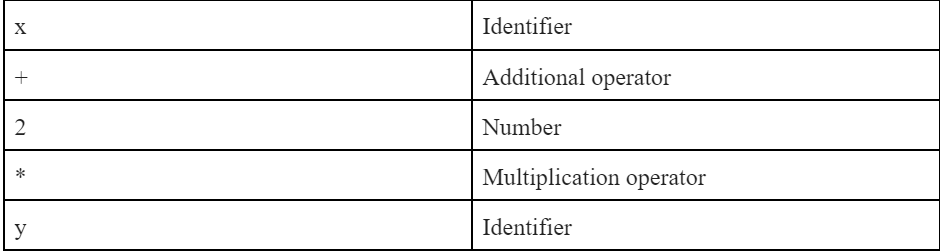













2. Syntax analysis is the second phase of compiler design process in which the given input string is checked for the confirmation of rules and structure of the formal structure.

This process comes after lexical analysis phase and is also known as the Parse tree where parsing occurs. There are two types of parsing techniques known as; top-down and bottom-up. Top-down begins at the root and grows towards the leaves while bottom-up begins from the leaves and heads towards the roots of the parse tree.
The parse tree is developed with the help of pre-defined grammar of the language

It also entails a context free grammer which contains 4 tuples which are S(start symbol), N(non-terminals), T(terminals) and P(productions). THere are two ways to come up with grammar derivation. Grammar derivation is a sequence of grammar rule which transforms a start symbol into a string. These two derivations include; Left most derivation and right most derivation.

In the left most derivation input is scanned and replaced from left to right sequence and vice-versa.

For example, parse tree for x+2*y is created as follows;

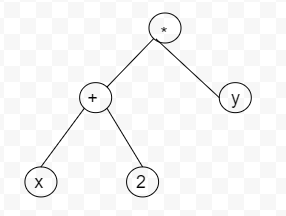

The tree is used to check that the correct sequence of operators and operands is used according to the programming language. For example, if the + operator were to come before 2 such that we had +2y, this would have been a syntax error.

Reference:
1. https://www.youtube.com/watch?v=zxhvpBLeagQ

Intermediate Code Representation: <br>
The Intermediate Code Generator phase involves generation of intermediate code for a target machine that needs to be generated in a way that it is easy for it to be translated into target machine code. <br>
Using the example of x+2*y, 3-address code representation can be used in Intermediate Code Representation since there are 3 operands in the above equation. In this case, the 3-address code representation will be: <br>
<br>
t1 = 2 <br>
t2 = y <br>
t3 = t1 * t2 <br>
t4 = x <br>
t5 = t4 + t3






**Semantic representation:**
Semantic analysis verifies the semantic accuracy of program declarations and statements. It is a group of actions that the parser invokes when the syntax calls for them.

Functions of semantic analysis
1.	It ensures data types are used in a way consistent with their definition
2.	It helps maintain flow control check

EXAMPLE

float x = 10.1;
float y = x*30;


# LAB 6 

1. Three Adress Code (TAC) for an If-Else statement:

**pseudocode**: If A < B and C < D then t = 1 else t = 0


**TAC**:

(1) If (A < B) goto (3)

(2) goto (4)

(3) If (C < D) goto (6)

(4) t = 0

(5) goto (7)

(6) t = 1

(7)

2. Three Adress Code for for-loop


fact(x)


{

    int f = 1;

    for (i = 2; i <= x; i++)
        f = f * i;
    return f;
}

TAC:

1.f = 1;

2.i = 2;

3.if (i > x) goto 9

4.t1 = f * i;

5.f = t1;

6.t2 = i + 1;

7.i = t2;

8.goto(3)

9.goto calling program

3. Three Address Code for while loop: <br>
<br>
*Pseudocode*: <br>
while (A < C and B > D) do <br>

if A = 1 then C = C + 1 <br>

else <br>

while A <= D <br>

do A = A + B <br>
<br> 

TAC: <br>
1. if (A < C) goto (3)
2. goto (15)
3. if (B > D) goto (5)
4. goto (15)
5. if (A = 1) goto (7)
6. goto (10)
7. T1 = c + 1
8. c = T1
9. goto (1)
10. if (A <= D) goto (12)
11. goto (1)
12. T2 = A + B
13. A = T2
14. goto (10)

 





**References for Lab 6**

1. https://www.gatevidyalay.com/tag/three-address-code-for-while-loop-example/

2. https://www.youtube.com/watch?v=ZKEMqKX5JMk&ab_channel=EngineeringGuruji

3. https://www.geeksforgeeks.org/compiler-design-detection-of-a-loop-in-three-address-code/